In [25]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def fileList(dir,func):
    return list(filter(func, os.listdir(dir)))
        

In [49]:
csvData = pd.concat(
    list(
        map(pd.read_csv,
            fileList("./", lambda file: file.find("sample-0") >= 0)
        )
    ),
    ignore_index=True
)

metaFile = open(fileList("./",lambda file: file.find("meta-")>=0)[0])
meta = json.load(metaFile)

    
columnNames=csvData.columns
parameterTypes =np.unique(list(
    map(
        lambda s: s[0:len(s)-1],
        filter(
            lambda s: (not s in ["iteration","lnP"]),
            columnNames.sort_values()
        )
    )
))

dataLen = len(csvData)
print(dataLen)
    
display(csvData.head(5))
print(parameterTypes)

458


iteration  MgN_beforeCrystallization0  growth_stoichiometry_orthopyroxene0  \
0          1                   87.280494                             0.482713   
1          2                   87.280494                             0.482713   
2          3                   82.176020                             0.461316   
3          4                   82.176020                             0.461316   
4          5                   88.723888                             0.415113   

   growth_stoichiometry_spinel0  MgN_beforeMixing0  \
0                      0.034813          79.246080   
1                      0.034813          79.246080   
2                      0.028212          81.433716   
3                      0.028212          81.433716   
4                      0.041380          82.965265   

   mixing_stoichiometry_orthopyroxene0  mixing_stoichiometry_spinel0  \
0                             0.444329                      0.037470   
1                             0.444329                      0.037470   
2                             0.495263                      0.055416   
3                             0.495263                      0.055416   
4                             0.503994                      0.046952   

   log10_tau0  MgN_beforeCrystallization1  \
0    6.162048                   89.074411   
1    6.162048                   89.074411   
2    5.978468                   83.001248   
3    5.978468                   83.001248   
4    6.131849                   82.711749   

   growth_stoichiometry_orthopyroxene1      ...       \
0                             0.481018      ...        
1                             0.481018      ...        
2                             0.466286      ...        
3                             0.466286      ...        
4                             0.365386      ...        

   mixing_stoichiometry_spinel7  log10_tau7  MgN_beforeCrystallization8  \
0                      0.047565    6.326848                   81.320478   
1                      0.047565    6.326848                   81.320478   
2                      0.054243    6.335688                   82.936538   
3                      0.054243    6.335688                   82.936538   
4                      0.052152    5.582335                   88.053521   

   growth_stoichiometry_orthopyroxene8  growth_stoichiometry_spinel8  \
0                             0.472489                      0.058364   
1                             0.472489                      0.058364   
2                             0.449529                      0.051379   
3                             0.449529                      0.051379   
4                             0.386961                      0.013796   

   MgN_beforeMixing8  mixing_stoichiometry_orthopyroxene8  \
0          81.254431                             0.493317   
1          81.254431                             0.493317   
2          79.210986                             0.497248   
3          79.210986                             0.497248   
4          77.846175                             0.393670   

   mixing_stoichiometry_spinel8  log10_tau8           lnP  
0                      0.055661    6.084773 -12959.131955  
1                      0.055661    6.084773  -9763.015177  
2                      0.054718    5.857525  -8436.887773  
3                      0.054718    5.857525  -8436.887773  
4                      0.058258    5.848595  -3941.358114  

[5 rows x 65 columns]

['MgN_beforeCrystallization' 'MgN_beforeMixing'
 'growth_stoichiometry_orthopyroxene' 'growth_stoichiometry_spinel'
 'log10_tau' 'mixing_stoichiometry_orthopyroxene'
 'mixing_stoichiometry_spinel']


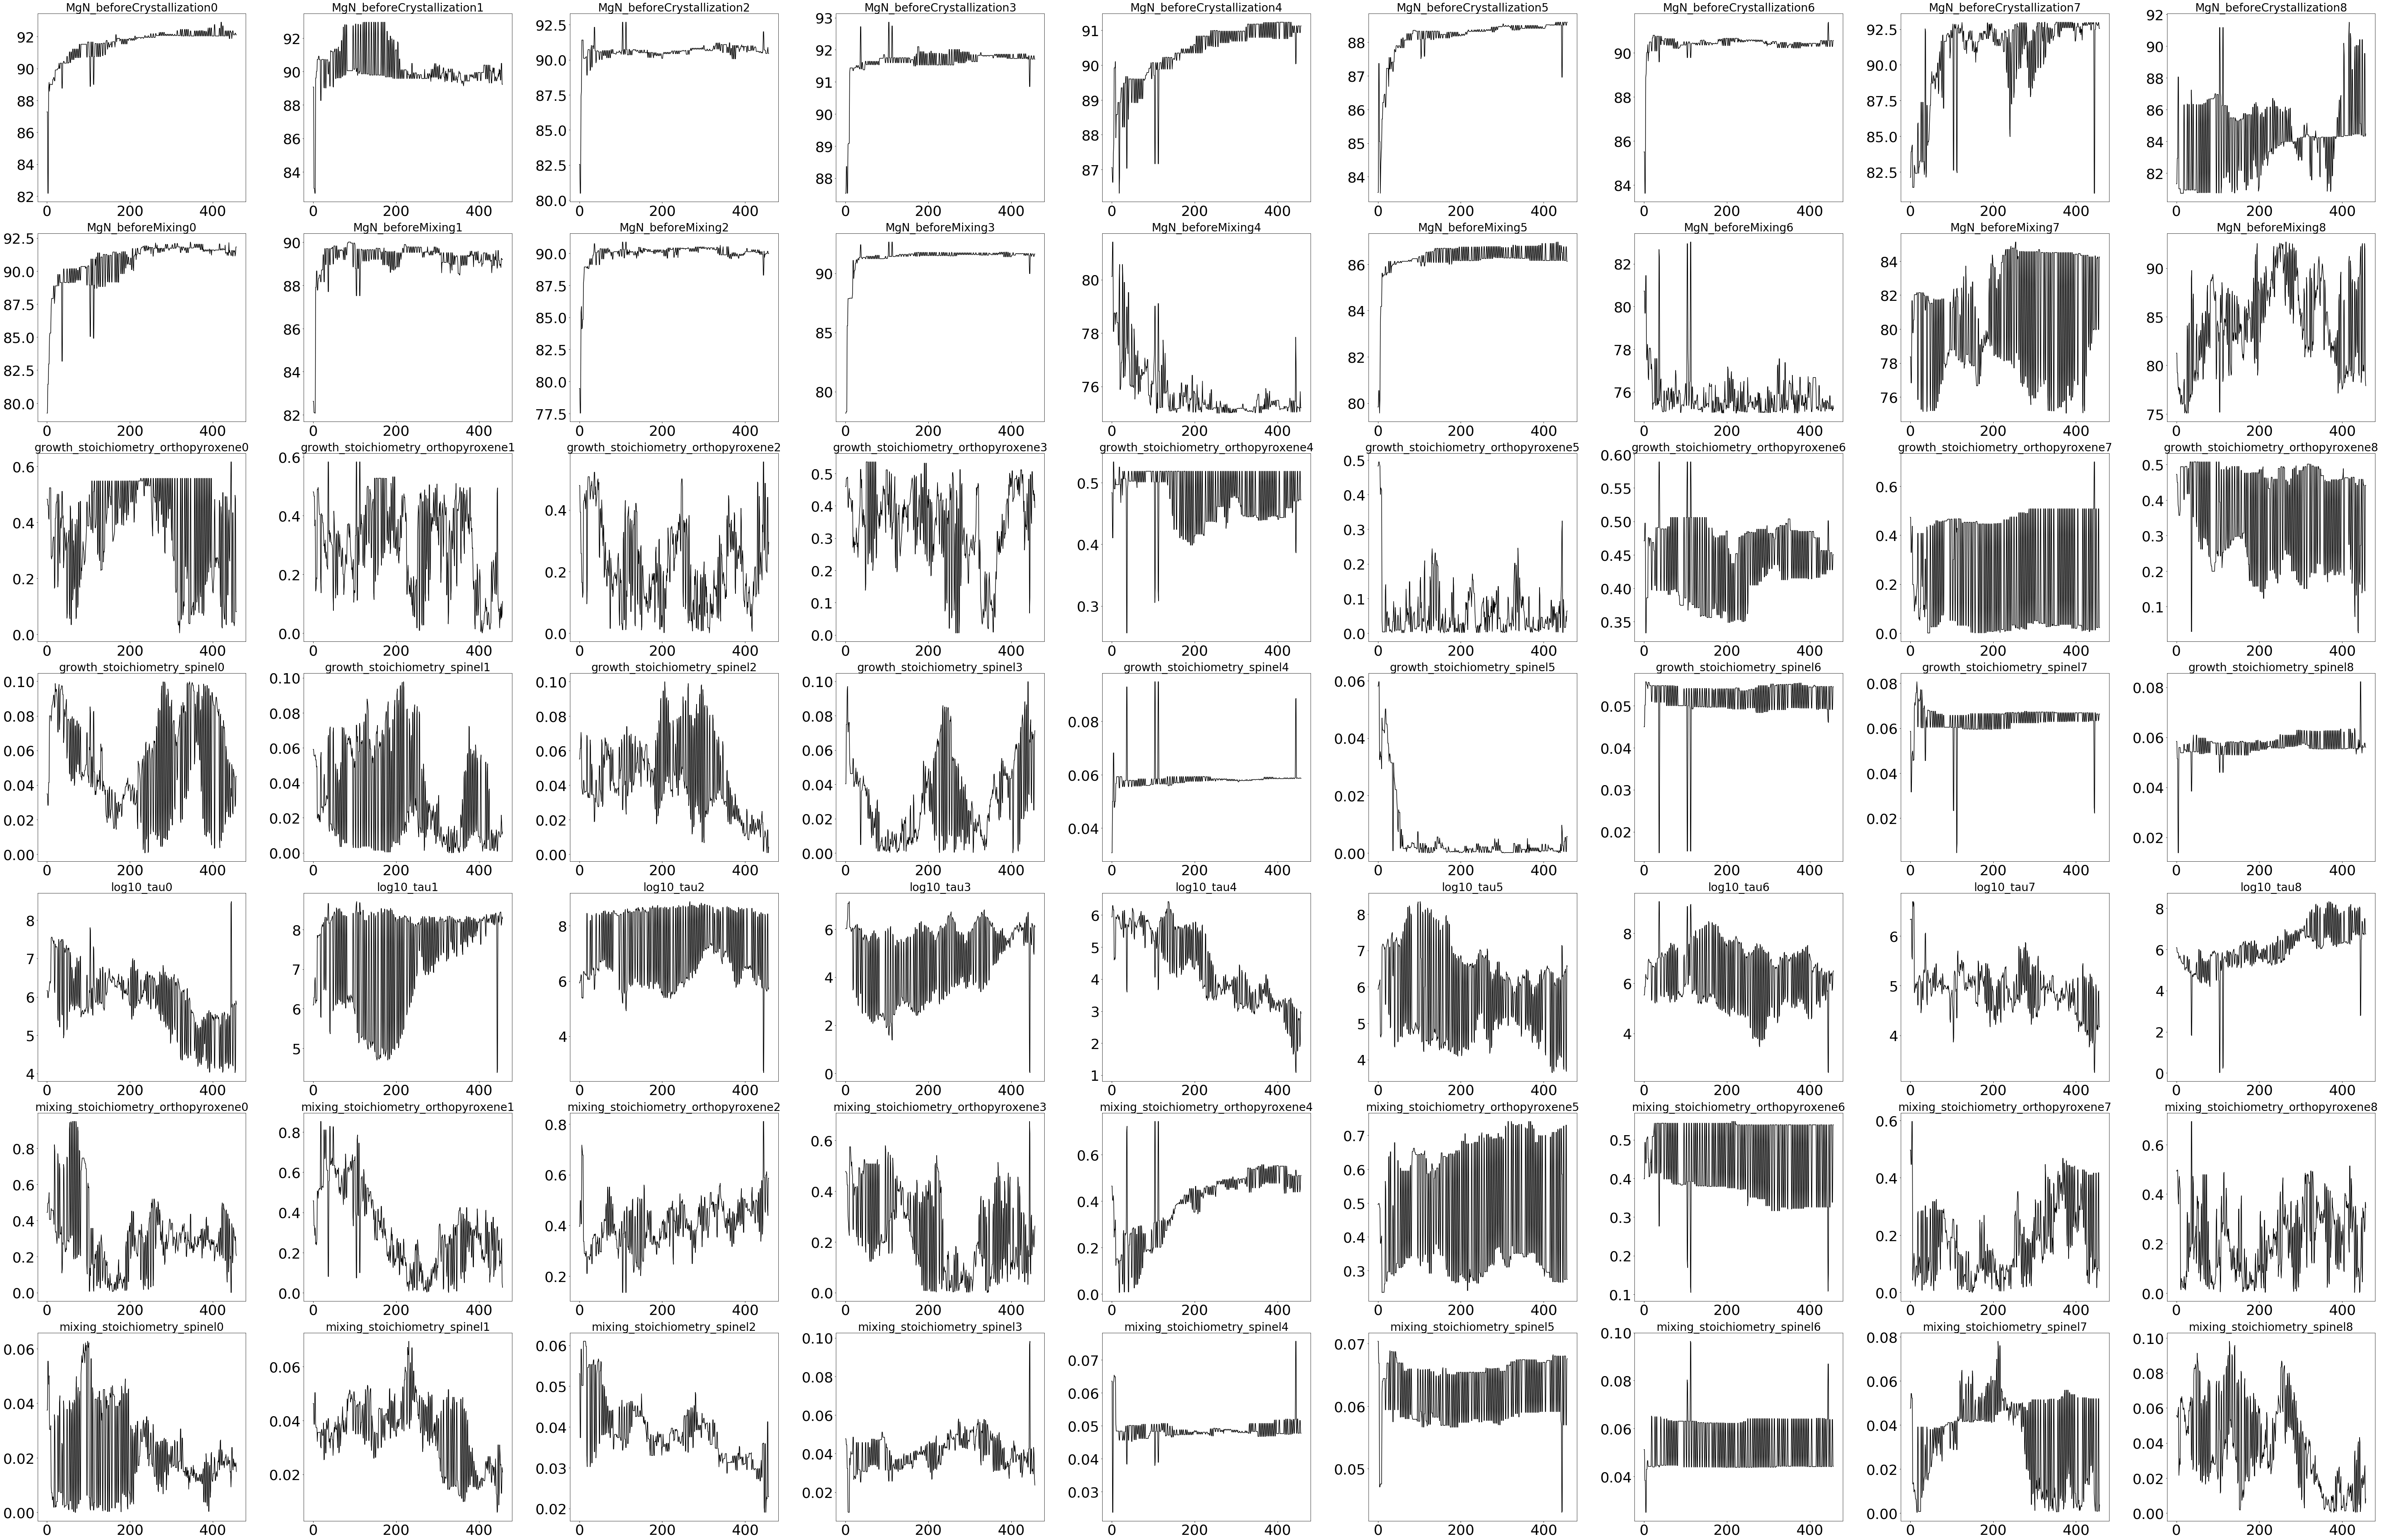

In [48]:
parameterSetNum = len(meta["acceptedTime"][0])
parameterTypeNum = len(parameterTypes)

dimX = parameterSetNum
dimY = parameterTypeNum
fig = plt.figure(figsize=(12*dimY,6*dimX), facecolor="white", edgecolor="black")
#plt.subplots_adjust(wspace=0.3, hspace=0.3)


graphNum = 1
for p in parameterTypes:
    for i in range(0,parameterSetNum):
    
        ax=fig.add_subplot(dimY,dimX,graphNum)
        ax.facecolor="white"
        ax.plot(csvData[:][p+str(i)], color="black")
        #ax.set_ylim(paramRange[p])
        ax.set_title(p+str(i),fontsize=28)
        ax.tick_params(labelsize=36)
        #ax.set_facecolor("white")
        ax.set_frame_on(True)
        graphNum = graphNum + 1
    
plt.tight_layout()

In [55]:
burnIn = 100
p_val = 0.05

<Figure size 432x288 with 0 Axes>

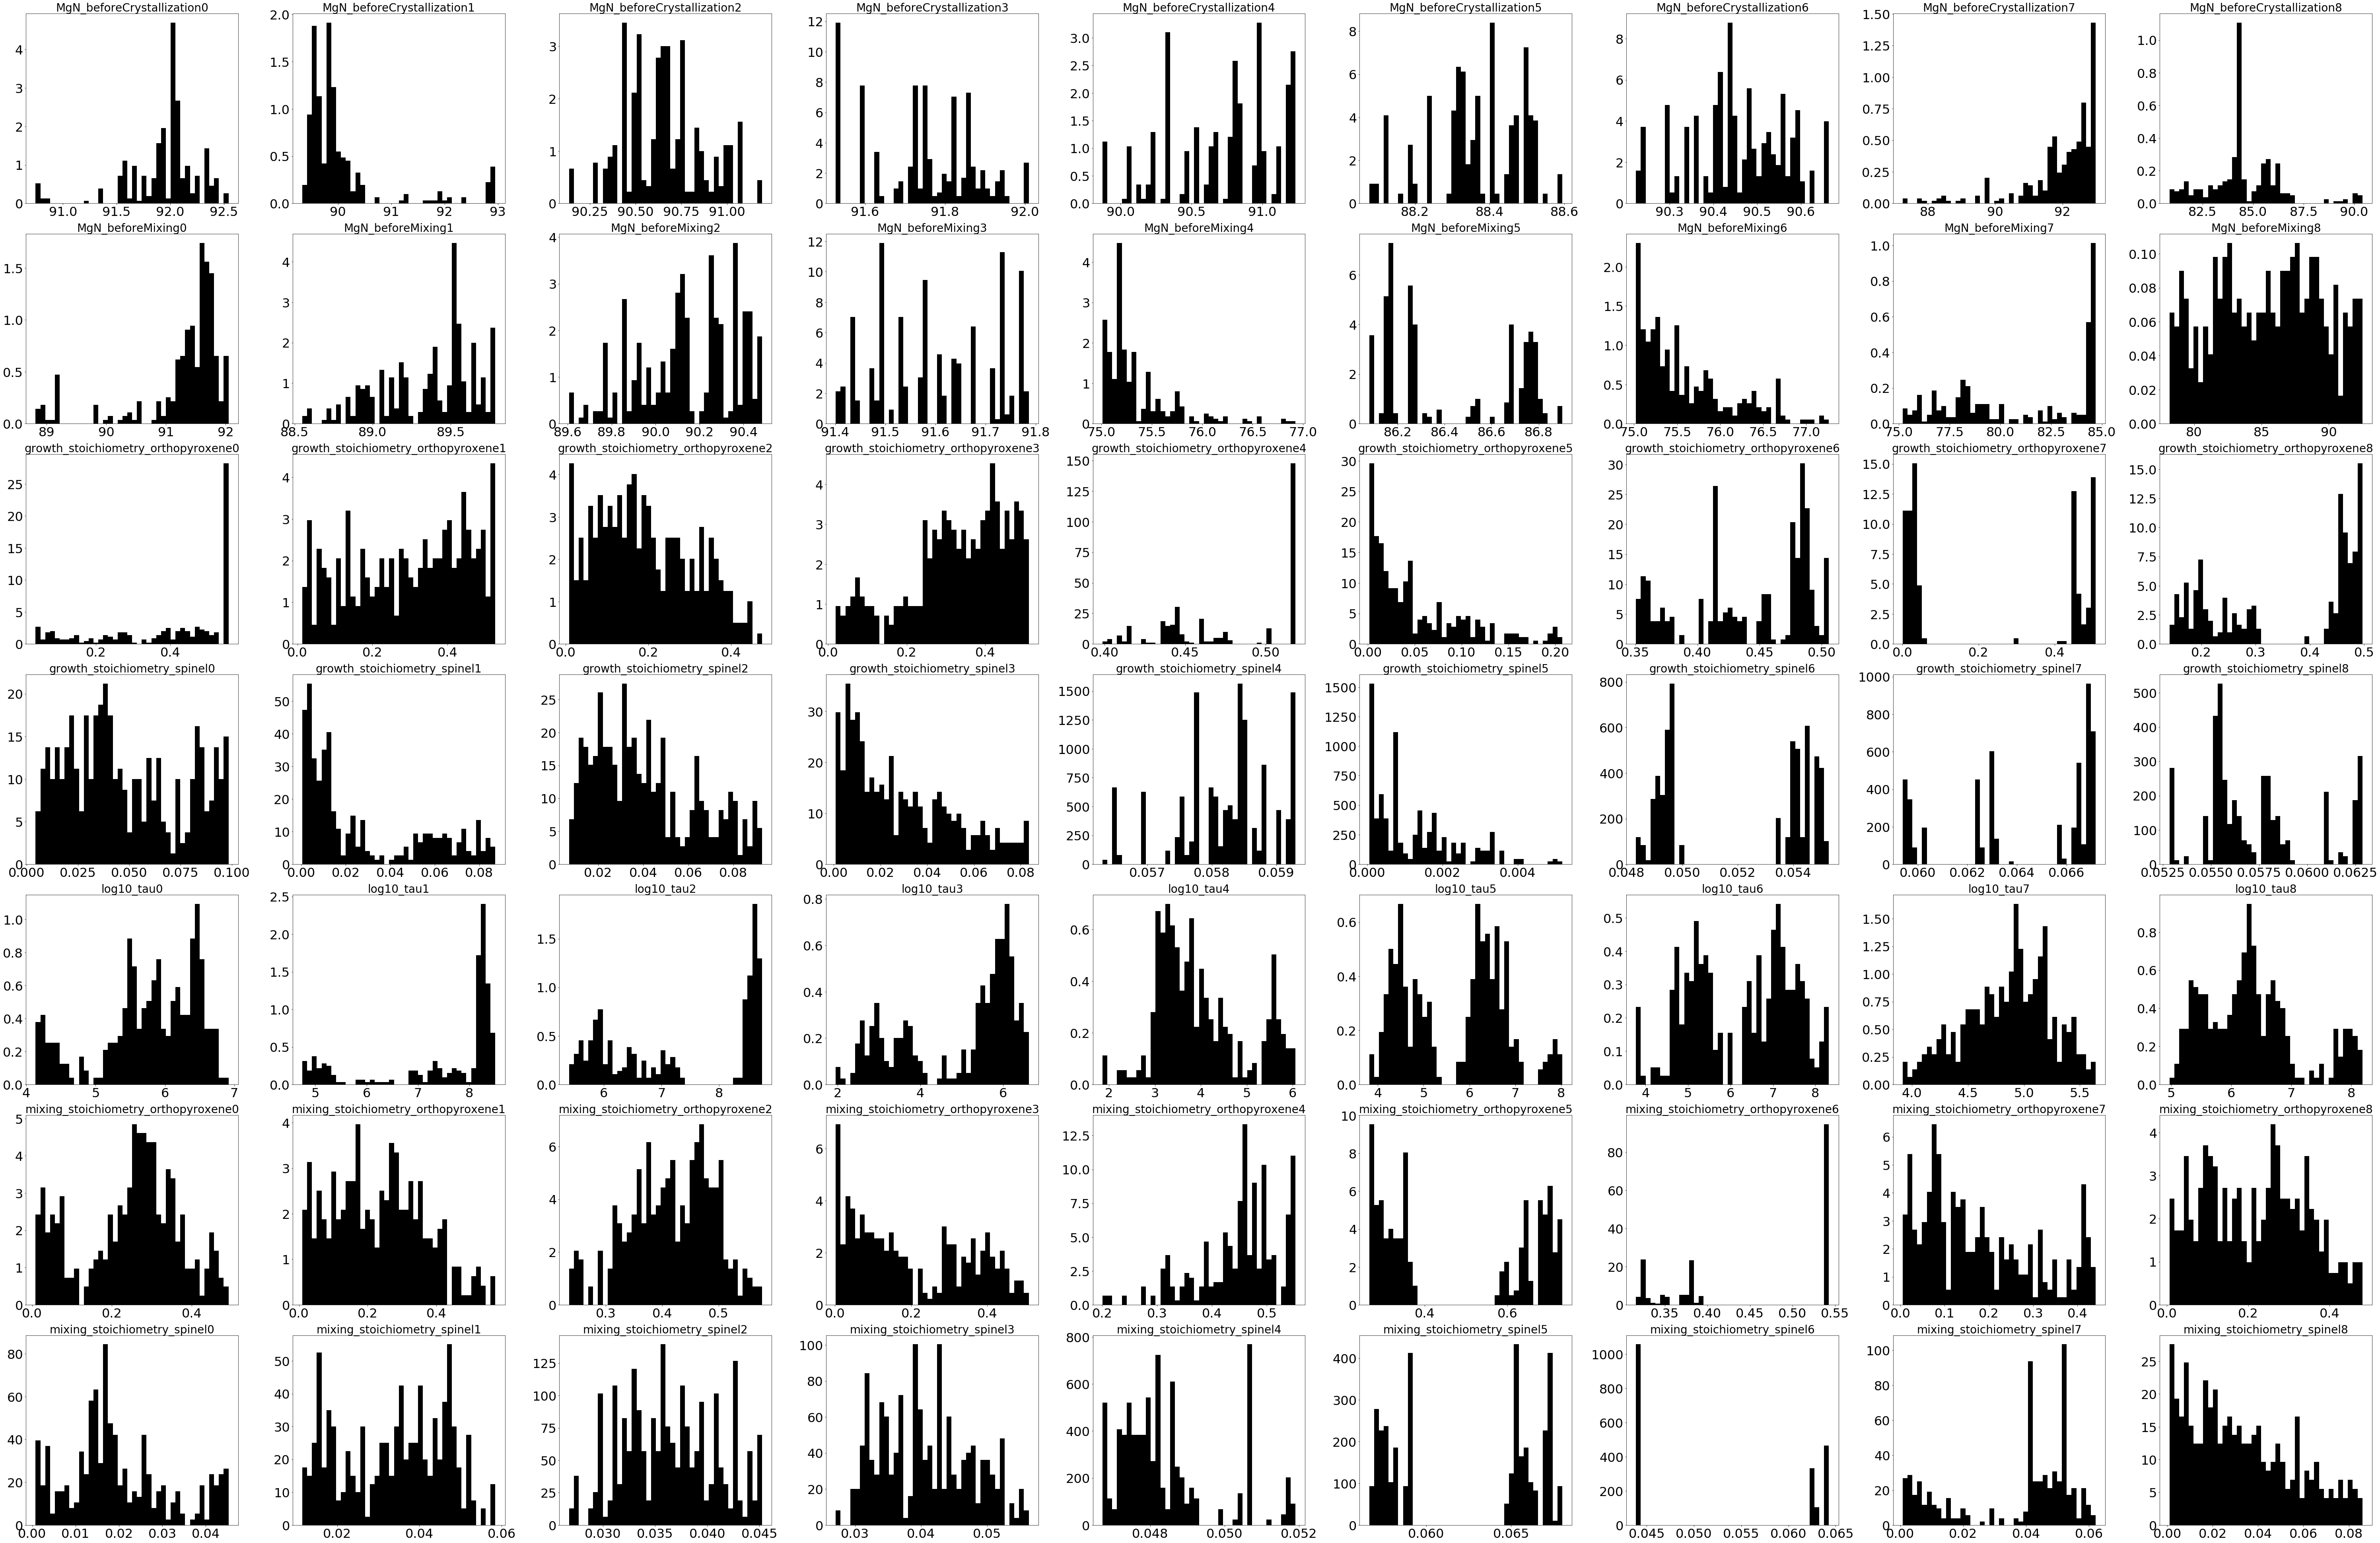

In [59]:
plt.subplots_adjust(wspace=0.4, hspace=0.6)


## ヒストグラム
dimX = parameterSetNum
dimY = parameterTypeNum
fig = plt.figure(figsize=(12*dimY,6*dimX), facecolor="white", edgecolor="black")


# 5%信用区間
lower = int((dataLen - burnIn)*(0.+p_val*0.5))
upper = int((dataLen - burnIn)*(1.-p_val*0.5))

graphNum=1
for p in parameterTypes:
    for i in range(0,parameterSetNum):
        ax=fig.add_subplot(dimY,dimX,graphNum)
        ax.hist(csvData[p+str(i)][burnIn:].sort_values()[lower:upper], bins=40, color="black", density=True)
        ax.set_title(p+str(i),fontsize=28)
        ax.tick_params(labelsize=32)
        #ax.set_xlim(paramRange[p])
        #ax.set_facecolor("white")
        #ax.grid(color="gray")
        graphNum = graphNum +1
    
plt.tight_layout()

In [58]:
mean = csvData[burnIn:dataLen].mean()
me = []

for v in mean:
    me.append(v)


std = csvData[burnIn:dataLen].std()
sd =[]

for v in std:
    sd.append(v)


binNum = 40
md = []

# 5%信用区間


for col in columnNames:
    hist=np.histogram(csvData[col][burnIn:dataLen].sort_values()[lower:upper],bins=binNum)
    md.append((hist[1][np.argmax(hist[0])]+hist[1][np.argmax(hist[0])+1])*0.5)


    
df = pd.DataFrame()

df["parameter"]=columnNames
df["mean"]=me
df["stdev"]=sd
df["mode"]=md


print(df)

pathSummaryOut="summary.csv"
df.to_csv(pathSummaryOut)

                              parameter        mean       stdev        mode
0                             iteration  279.500000  103.489935  113.250000
1            MgN_beforeCrystallization0   91.921266    0.487276   92.026962
2   growth_stoichiometry_orthopyroxene0    0.396522    0.177172    0.550647
3          growth_stoichiometry_spinel0    0.048501    0.028775    0.038445
4                     MgN_beforeMixing0   91.222939    1.029111   91.605401
5   mixing_stoichiometry_orthopyroxene0    0.246930    0.133208    0.256472
6          mixing_stoichiometry_spinel0    0.020198    0.012904    0.016906
7                            log10_tau0    5.773612    0.795837    6.465220
8            MgN_beforeCrystallization1   90.127351    0.954671   89.829951
9   growth_stoichiometry_orthopyroxene1    0.298591    0.160807    0.521118
10         growth_stoichiometry_spinel1    0.028424    0.028777    0.003687
11                    MgN_beforeMixing1   89.337845    0.374150   89.523311
12  mixing_s